In [3]:
import pandas as pd
import random
from faker import Faker

# Set seed
random.seed(42)
fake = Faker()

num_samples = 500

fake = Faker('en_IN') 
names = [fake.name() for _ in range(num_samples)]



# Generate candidate info
names = [fake.name() for _ in range(num_samples)]
gpas = [round(random.uniform(5.5, 9.8), 2) for _ in range(num_samples)]
tech_scores = [random.randint(40, 100) for _ in range(num_samples)]
projects = [random.randint(0, 5) for _ in range(num_samples)]
english_levels = [random.randint(1, 5) for _ in range(num_samples)]
experience_years = [random.choice([0, 1, 2, 3]) for _ in range(num_samples)]
certifications = [random.randint(0, 3) for _ in range(num_samples)]
internships = [random.choice(['Yes', 'No']) for _ in range(num_samples)]
hackathons = [random.choice(['Yes', 'No']) for _ in range(num_samples)]
ages = [random.randint(20, 28) for _ in range(num_samples)]

# Label: 1 if meets selection criteria, else 0
selected = [
    1 if gpa > 7.5 and tech > 70 and proj >= 2 and exp > 0 else 0
    for gpa, tech, proj, exp in zip(gpas, tech_scores, projects, experience_years)
]

# Create dataframe
df = pd.DataFrame({
    'Candidate_Name': names,
    'GPA': gpas,
    'Tech_Test_Score': tech_scores,
    'Num_Projects': projects,
    'English_Proficiency': english_levels,
    'Experience_Years': experience_years,
    'Certifications': certifications,
    'Internship': internships,
    'Hackathon': hackathons,
    'Age': ages,
    'Selected': selected
})


df.to_csv("hiring_dataset.csv", index=False)




In [5]:
df=pd.read_csv ("hiring_dataset.csv")

In [6]:
df

,Candidate_Name,GPA,Tech_Test_Score,Num_Projects,English_Proficiency,Experience_Years,Certifications,Internship,Hackathon,Age,Selected
0,Ranbir Wable,8.25,79,5,1,0,3,No,Yes,21,0
1,Jairaj Jhaveri,5.61,74,3,4,3,2,No,No,27,0
2,Watika Lalla,6.68,41,0,3,2,3,No,No,27,0
3,Darpan Mukhopadhyay,6.46,98,1,4,1,3,No,Yes,27,0
4,Rehaan Chauhan,8.67,65,2,1,0,1,No,Yes,21,0
...,...,...,...,...,...,...,...,...,...,...,...
495,Waida Mani,8.42,73,0,3,1,3,Yes,Yes,22,0
496,Falguni Dar,7.24,63,4,5,3,3,No,Yes,24,0
497,Megha Palla,6.21,79,4,4,3,0,Yes,No,22,0
498,Triya Sura,7.51,88,4,3,0,0,Yes,No,28,0


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve,roc_curve, average_precision_score, f1_score
from sklearn.svm import SVC

In [47]:
df = pd.read_csv("hiring_dataset.csv")
df.head()


,Candidate_Name,GPA,Tech_Test_Score,Num_Projects,English_Proficiency,Experience_Years,Certifications,Internship,Hackathon,Age,Selected
0,Ranbir Wable,8.25,79,5,1,0,3,No,Yes,21,0
1,Jairaj Jhaveri,5.61,74,3,4,3,2,No,No,27,0
2,Watika Lalla,6.68,41,0,3,2,3,No,No,27,0
3,Darpan Mukhopadhyay,6.46,98,1,4,1,3,No,Yes,27,0
4,Rehaan Chauhan,8.67,65,2,1,0,1,No,Yes,21,0


In [48]:
df= df.drop('Candidate_Name', axis=1)

In [49]:
df= pd.get_dummies (df, drop_first=True)

In [50]:
X= df.drop('Selected', axis=1)
y= df['Selected']

In [51]:
X_train , X_test,y_train, y_test = train_test_split( X,y, test_size=0.2, random_state=42)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.90      0.95        10

    accuracy                           0.99       100
   macro avg       0.99      0.95      0.97       100
weighted avg       0.99      0.99      0.99       100


Confusion Matrix:



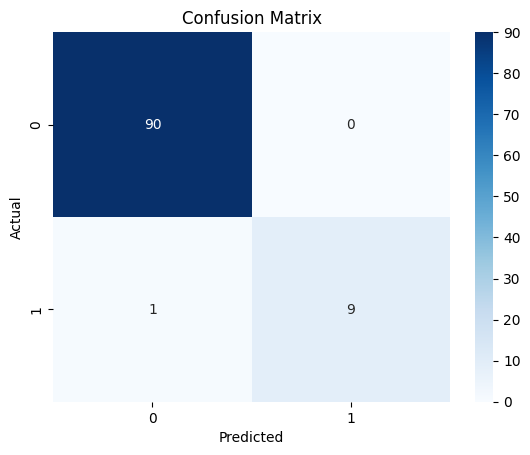

In [52]:
rf= RandomForestClassifier()
rf.fit (X_train , y_train)
y_pred_lr= rf.predict (X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [53]:
lr= LogisticRegression (max_iter=500, n_jobs= None)
lr.fit (X_train , y_train )
y_pred_lr= lr.predict (X_test)

print (" Logistic Regression Report:\n\n", classification_report(y_test, y_pred_lr))

 Logistic Regression Report:

               precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.78      0.70      0.74        10

    accuracy                           0.95       100
   macro avg       0.87      0.84      0.85       100
weighted avg       0.95      0.95      0.95       100



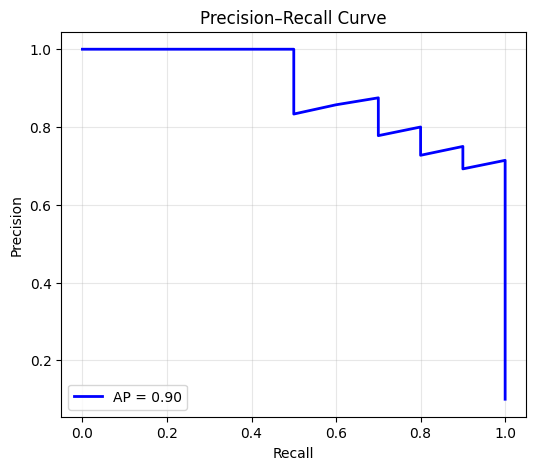

In [54]:

y_scores = lr.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

ap = average_precision_score(y_test, y_scores)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color="blue", lw=2, label=f"AP = {ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()


In [55]:
svm= SVC(kernel="rbf", class_weight='balanced',probability=True,  random_state=42)
svm.fit( X_train , y_train)
y_pred_svm = svm.predict (X_test)

print (" SVM accuracy scores:", accuracy_score (y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


 SVM accuracy scores: 0.57
              precision    recall  f1-score   support

           0       1.00      0.52      0.69        90
           1       0.19      1.00      0.32        10

    accuracy                           0.57       100
   macro avg       0.59      0.76      0.50       100
weighted avg       0.92      0.57      0.65       100



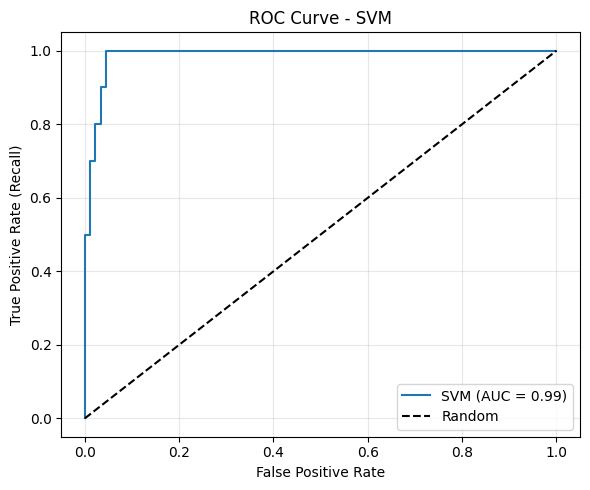

In [56]:
# ROC Curve 
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})", color="#1f77b4")
plt.plot([0,1], [0,1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb= gb.predict(X_test)

print ("Gradient boosting :", accuracy_score (y_test, y_pred_gb))
print("\n",classification_report(y_test, y_pred_gb))

Gradient boosting : 0.99

               precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.90      0.95        10

    accuracy                           0.99       100
   macro avg       0.99      0.95      0.97       100
weighted avg       0.99      0.99      0.99       100



In [58]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric="logloss")

xgb.fit(X_train, y_train)

y_pred_xgb= xgb.predict(X_test)

print ("Gradient boosting :", accuracy_score (y_test, y_pred_xgb))
print("\n",classification_report(y_test, y_pred_xgb))

Gradient boosting : 1.0

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        10

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



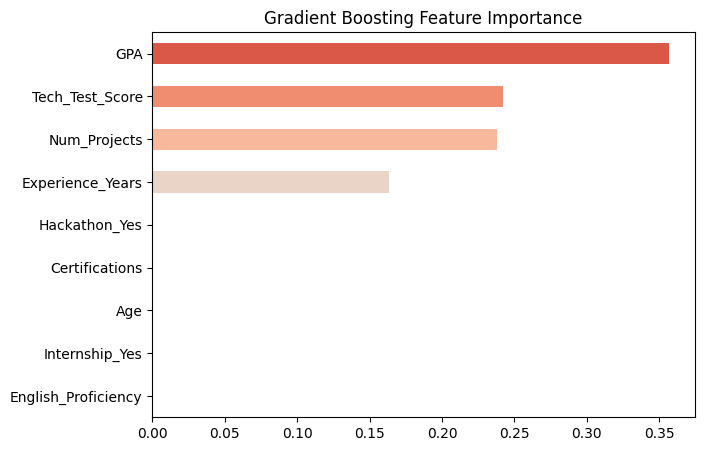

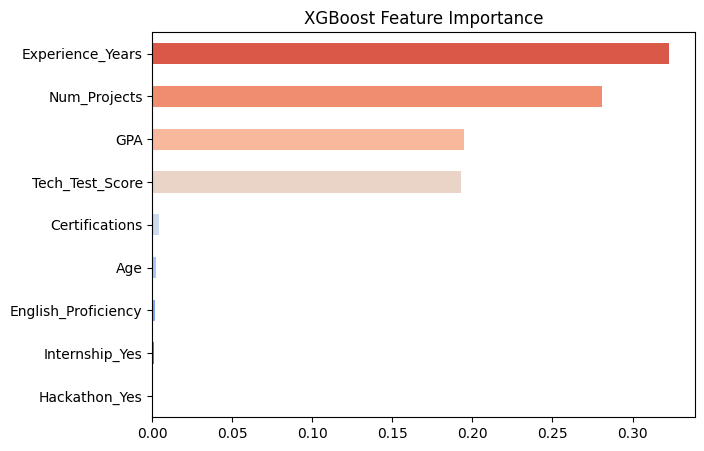

In [59]:

def plot_feature_importance(model, X, title):
    importance = model.feature_importances_
    features = pd.Series(importance, index=X.columns).sort_values(ascending=True)
    plt.figure(figsize=(7,5))

    colors = plt.cm.coolwarm(np.linspace(0, 1, 10)) 
    features.tail(10).plot(kind="barh", color=colors)
            
    plt.title(title)
    plt.show()

plot_feature_importance(gb, X_train, "Gradient Boosting Feature Importance")
plot_feature_importance(xgb, X_train, "XGBoost Feature Importance")


In [61]:
models = {
    "Logistic Regression": lr,   
    "SVM (RBF)": svm,
    "Random Forest": rf,              
    "Gradient Boosting": gb,
    "XGBoost": xgb
}

results = []

for name, model in models.items():
    # Predictions & probabilities
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
    else:
        y_proba = model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    results.append([name, acc, f1, auc])

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "ROC-AUC"])
print(df_results.sort_values("ROC-AUC", ascending=False).reset_index(drop=True))

                 Model  Accuracy  F1 Score   ROC-AUC
0        Random Forest      0.99  0.947368  1.000000
1              XGBoost      1.00  1.000000  1.000000
2    Gradient Boosting      0.99  0.947368  1.000000
3  Logistic Regression      0.95  0.736842  0.987778
4            SVM (RBF)      0.57  0.317460  0.922222


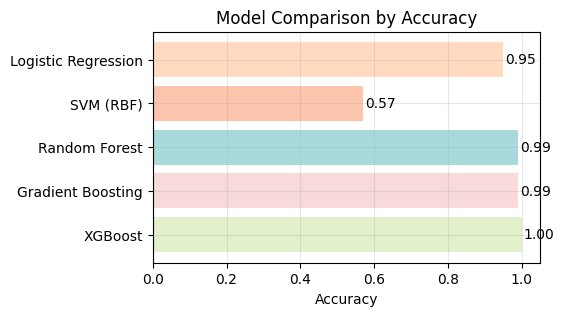

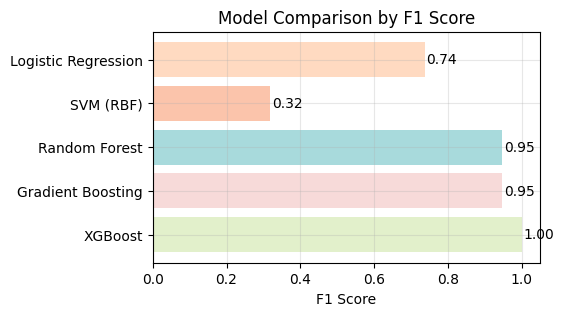

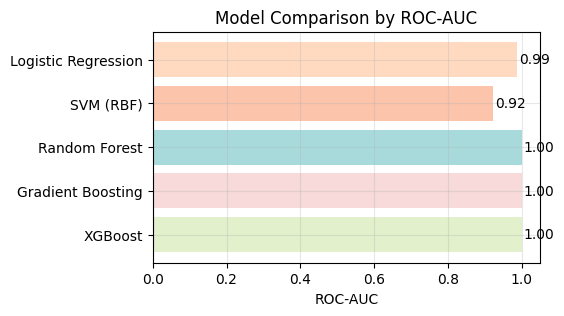

In [62]:
import matplotlib.pyplot as plt

# Assuming df_results is already created from the previous code
metrics = ["Accuracy", "F1 Score", "ROC-AUC"]

for metric in metrics:
    plt.figure(figsize=(5,3))
    plt.barh(df_results["Model"], df_results[metric], color=["#FFDAC1","#FBC4AB","#A8DADC","#F7DAD9","#E2F0CB"])
    plt.xlabel(metric)
    plt.title(f"Model Comparison by {metric}")
    plt.gca().invert_yaxis()  # so best model appears at top
    plt.grid(alpha=0.3)
    for i, v in enumerate(df_results[metric]):
         plt.text(v + 0.005, i, f"{v:.2f}", va="center")  # add values on bars
    plt.show()


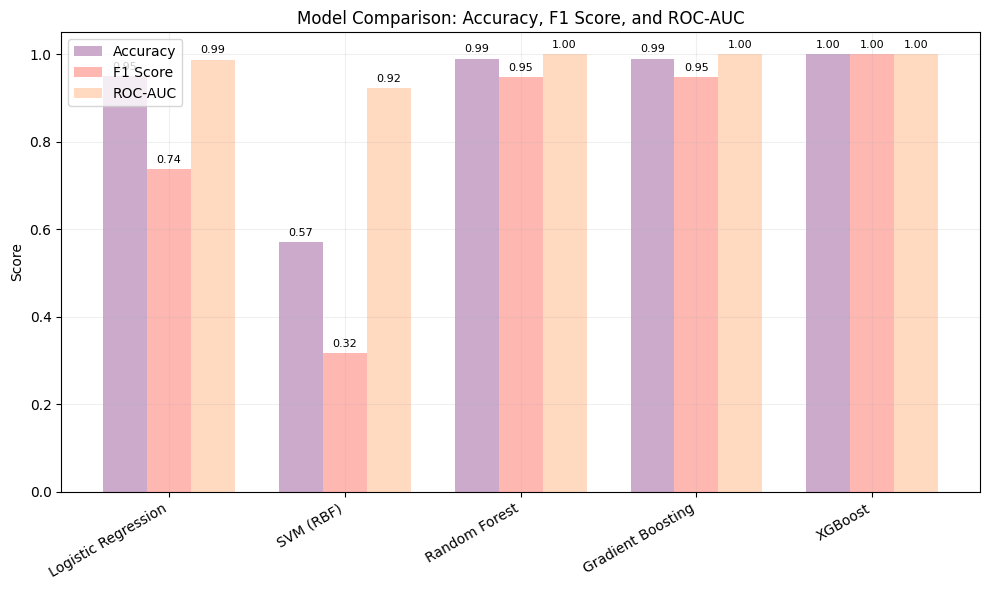

In [63]:

metrics = ["Accuracy", "F1 Score", "ROC-AUC"]

x = np.arange(len(df_results["Model"]))  
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10,6))

# Bars for each metric
rects1 = ax.bar(x - width, df_results["Accuracy"], width, label="Accuracy", color="#CBAACB")
rects2 = ax.bar(x, df_results["F1 Score"], width, label="F1 Score", color="#FFB7B2")
rects3 = ax.bar(x + width, df_results["ROC-AUC"], width, label="ROC-AUC", color="#FFDAC1")

# Labels and title
ax.set_ylabel("Score")
ax.set_title("Model Comparison: Accuracy, F1 Score, and ROC-AUC")
ax.set_xticks(x)
ax.set_xticklabels(df_results["Model"], rotation=30, ha="right")
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=8)

for rects in [rects1, rects2, rects3]:
    autolabel(rects)

plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()


In [64]:
preds = model.predict(X_test)
pd.Series(preds).replace({0:"Rejected",1:"Selected"}).value_counts()


Rejected    90
Selected    10
Name: count, dtype: int64